## Cardio Decision Tree

In [1]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier #decision tree classifierfrom sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #scale data
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix 
from math import sqrt  # for root mean-squared error calculation
import matplotlib
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map


from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import binarize
from sklearn.metrics import precision_recall_curve

/Users/jmwanat/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# define a function to return model metrics for evaluation

def model_metrics(y_known, y_pred):
    y_test = y_known
    y_pred_class = y_pred
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    class_error = 1 - metrics.accuracy_score(y_test, y_pred_class)
    sensitivity = metrics.recall_score(y_test, y_pred_class)
    specificity = TN / (TN + FP)
    false_positive_rate = FP / float(TN + FP)
    precision = TP / float(TP + FP)
    f1_score = metrics.f1_score(y_test, y_pred_class)
#    F1 = 2*precision*sensitivity/(precision + sensitivity)
    print('The model metrics are:',
         '\naccuracy:', accuracy,
         '\nclassification error:', class_error,
         '\nsensitivity:', sensitivity,
         '\nspecificity:', specificity,
         '\nfalse positive rate:', false_positive_rate,
         '\nprecision:', precision,
          '\nF1 score:', f1_score,
#          '\nF1 by hand:', F1,
         '\nconfusion matrix:')
    return(confusion)


In [3]:
# define a function that accepts a threshold and 
# prints sensitivity and specificity

def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [4]:
# define a function that accepts the fpr and tpr values 
# from the roc_curve function and plot the ROC curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for response')

In [5]:
# define a function that accepts the recall and precision values 
# from the precision_recall_curve function and plot the PR curve

def plot_pr_curve(recall, precision, label=None):
    plt.plot(recall, precision, linewidth=2, label=label)
#    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve for response')

In [6]:
# initial work with the smaller data set
X_test = pd.read_csv('cardio_x_test.csv', sep = ',', encoding = 'unicode_escape')  
X_train = pd.read_csv('cardio_x_train.csv', sep = ',', encoding = 'unicode_escape')  
y_test = pd.read_csv('cardio_y_test.csv', sep = ',', encoding = 'unicode_escape')  
y_train = pd.read_csv('cardio_y_train.csv', sep = ',', encoding = 'unicode_escape')
# examine the shape of original input data
print('The shape of the X test set is: ', X_test.shape)
print('The shape of the X train set is: ',X_train.shape)
print('The shape of the Y test set is: ',y_test.shape)
print('The shape of the Y train set is: ',y_train.shape)

The shape of the X test set is:  (13750, 24)
The shape of the X train set is:  (54997, 24)
The shape of the Y test set is:  (13750, 2)
The shape of the Y train set is:  (54997, 2)


In [7]:
#drop unnecessary columns for model
X_train = X_train.drop(['Unnamed: 0', 'id', 'age_days', 'LATITUDE',
                 'LONGITUDE','ZIP','FACILITY_NAME','ADDRESS',
                 'CITY','STATE','DESCRIPTION','FACILITY_TYPE' ], axis=1)
X_test = X_test.drop(['Unnamed: 0', 'id', 'age_days', 'LATITUDE',
                 'LONGITUDE','ZIP','FACILITY_NAME','ADDRESS',
                 'CITY','STATE','DESCRIPTION','FACILITY_TYPE' ], axis=1)
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_test = y_test.drop(['Unnamed: 0'], axis=1)    


In [8]:
y_train = y_train.rename(columns={"x": "cardio"})
y_test = y_test.rename(columns={"x": "cardio"})

In [9]:
#total number of NaN values in each column
print('The total number of NaN values in the X test set is:\n', X_test.isnull().sum())
print('The total number of NaN values in the X train set is:\n',X_train.isnull().sum())
print('The total number of NaN values in the Y test set is:\n',y_test.isnull().sum())
print('The total number of NaN values in the Y train set is:\n',y_train.isnull().sum())

The total number of NaN values in the X test set is:
 age_years      0
gender         0
height_cm      0
weight_kg      0
BMI            0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alcohol        0
active         0
dtype: int64
The total number of NaN values in the X train set is:
 age_years      0
gender         0
height_cm      0
weight_kg      0
BMI            0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alcohol        0
active         0
dtype: int64
The total number of NaN values in the Y test set is:
 cardio    0
dtype: int64
The total number of NaN values in the Y train set is:
 cardio    0
dtype: int64


In [10]:
# mapping function to convert text female/male to integer 1/2
convert_to_binary = {'female' : 1, 'male' : 2}

# define binary variable for gender
X_train['gender'] = X_train['gender'].map(convert_to_binary)
X_test['gender'] = X_test['gender'].map(convert_to_binary)

In [11]:
X_train.head()

,age_years,gender,height_cm,weight_kg,BMI,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohol,active
0,62,1,160,101.0,39.453125,120,70,1,1,0,0,1
1,41,2,172,78.0,26.365603,140,80,1,1,0,0,1
2,57,1,168,80.0,28.344671,140,90,1,1,0,0,1
3,52,1,161,75.0,28.934069,110,80,2,3,0,0,1
4,39,1,169,64.0,22.408179,100,70,1,1,0,0,1


In [12]:
y_train.head()

,cardio
0,1
1,0
2,1
3,0
4,0


In [13]:
#Set the decision tree classifier
dt = DecisionTreeClassifier()
#dt.fit(X_train, y_train)

# Fit the model
dt_fit = dt.fit(X_train, y_train)

print('\n----------------------------')
print('Decision Tree\n')
print(dt_fit)


----------------------------
Decision Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [14]:
#make prediction
y_pred = dt.predict(X_test)

In [15]:
# precision, recall, F1 score, and count of response variable
# of decision tree
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4535 2432]
 [2567 4216]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      6967
           1       0.63      0.62      0.63      6783

    accuracy                           0.64     13750
   macro avg       0.64      0.64      0.64     13750
weighted avg       0.64      0.64      0.64     13750



In [16]:
# evaluate gradient boosting classifer
model_metrics(y_test, y_pred)

The model metrics are: 
accuracy: 0.6364363636363637 
classification error: 0.3635636363636363 
sensitivity: 0.6215538847117794 
specificity: 0.6509257930242572 
false positive rate: 0.34907420697574276 
precision: 0.6341756919374247 
F1 score: 0.6278013550740823 
confusion matrix:


array([[4535, 2432],
       [2567, 4216]])

Confusion matrix, without normalization
[[4535 2432]
 [2567 4216]]
Normalized confusion matrix
[[0.6509 0.3491]
 [0.3784 0.6216]]


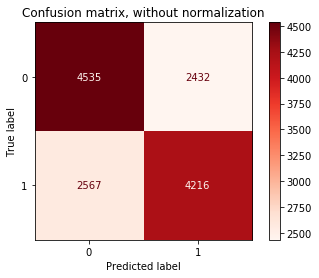

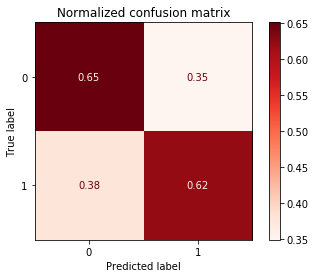

In [24]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.metrics import plot_confusion_matrix

target_names=['0', '1']
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None, "0.0f"),
                  ("Normalized confusion matrix", 'true', None)]
for title, normalize, values_format in titles_options:
    disp = plot_confusion_matrix(dt, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize,
                                 values_format=values_format,
                                )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    #plt.grid(None)
    plt.savefig('Decision Tree {0}.png'.format(title))

    
plt.show()

In [18]:
print("Training set score: {:.2f}".format(dt_fit.score(X_train, y_train)))
print("Test set score: {:.2f}".format(dt_fit.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.64


## ROC Curve

In [19]:
# make predicted probabilities for the predictions
# logistic regression, C = 0.1
# store the predicted probabilities for class 1 of response

y_pred_prob_class1 = dt.predict_proba(X_test)[:, 1]

In [20]:
# the first argument is true values, 
# the second argument is predicted probabilities

# pass y_test and y_pred_prob
# do not use y_pred_class, because it will 
# give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_class1)

In [21]:
# a check of thresholds
thresholds

array([2.    , 1.    , 0.8333, 0.75  , 0.7143, 0.6667, 0.625 , 0.6   ,
       0.5833, 0.5   , 0.4615, 0.4545, 0.4286, 0.4   , 0.3636, 0.3333,
       0.2857, 0.25  , 0.2   , 0.1875, 0.1818, 0.1667, 0.1429, 0.125 ,
       0.    ])

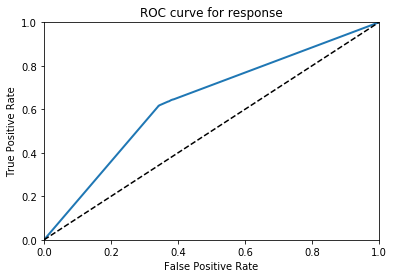

In [22]:
# plot the ROC curve for the decision tree
    
plot_roc_curve(fpr, tpr)
plt.savefig('ROC_decision_tree_plot.pdf')
plt.show()

In [23]:
# AUC is the percentage of the ROC plot that is underneath the curve
# first argument is true values, second argument is predicted probabilities
# AUC for decision tree

roc_auc_dt_class1 = metrics.roc_auc_score(y_test, y_pred_prob_class1)

print('\nThe AUC is:', roc_auc_dt_class1)


The AUC is: 0.6381911092797131
